## Importing Necessary Libraries

In [108]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
import numpy as np
import scipy.stats
from scipy.stats import anderson
from collections import Counter

In [240]:
change_tariff = pd.read_csv('./data/change_tariff.csv')
change_tariff.head()

,TIME_KEY,AVG_ARPU_PREV_3M,AVG_ARPU_NEXT_3M,ID_NUMBER,tariff_plan_code_from,tariff_plan_code_to
0,2019-10-01 00:00:00.0,104.80,3466.71,5746,tariff_8,tariff_9
1,2019-10-01 00:00:00.0,1942.23,2789.06,11102,tariff_2,tariff_13
2,2019-10-01 00:00:00.0,4485.72,5500.61,13477,tariff_18,tariff_8
3,2019-10-01 00:00:00.0,1959.71,10069.25,16127,tariff_8,tariff_10
4,2019-10-01 00:00:00.0,1337.31,862.58,16626,tariff_8,tariff_10


In [238]:
# Tariff 1
# 806
tariff_1 = change_tariff[change_tariff['tariff_plan_code_from'] == 'tariff_1']
tariff_1

,TIME_KEY,AVG_ARPU_PREV_3M,AVG_ARPU_NEXT_3M,ID_NUMBER,tariff_plan_code_from,tariff_plan_code_to
8,2019-10-01 00:00:00.0,84.12,2122.33,26753,tariff_1,tariff_8
31,2019-10-01 00:00:00.0,806.24,2340.32,18260,tariff_1,tariff_9
55,2019-10-01 00:00:00.0,2.06,5280.67,1194,tariff_1,tariff_10
70,2019-10-01 00:00:00.0,139.67,0.00,33628,tariff_1,tariff_8
98,2019-10-01 00:00:00.0,718.07,3788.87,8628,tariff_1,tariff_21
...,...,...,...,...,...,...
14710,2019-10-01 00:00:00.0,3.86,81.57,1477,tariff_1,tariff_9
14733,2019-10-01 00:00:00.0,313.84,9365.85,7177,tariff_1,tariff_10
14739,2019-10-01 00:00:00.0,1581.65,2795.12,32688,tariff_1,tariff_13
14745,2019-10-01 00:00:00.0,4585.51,2968.45,7709,tariff_1,tariff_13


In [244]:
# На какие тарифы переходят с Тарифа 1 ?

tariff_1 = change_tariff[change_tariff['tariff_plan_code_from'] == 'tariff_1'].groupby(['tariff_plan_code_from','tariff_plan_code_to']).count()
tariff_1

TIME_KEY  AVG_ARPU_PREV_3M  \
tariff_plan_code_from tariff_plan_code_to                               
tariff_1              tariff_10                  58                58   
                      tariff_11                  22                22   
                      tariff_12                   7                 7   
                      tariff_13                 112               112   
                      tariff_21                  23                23   
                      tariff_4                  119               119   
                      tariff_8                  313               313   
                      tariff_9                  152               152   

                                           AVG_ARPU_NEXT_3M  ID_NUMBER  
tariff_plan_code_from tariff_plan_code_to                               
tariff_1              tariff_10                          58         58  
                      tariff_11                          22         22  
                      tariff_12                           7          7  
                      tariff_13                         112        112  
                      tariff_21                          23         23  
                      tariff_4                          119        119  
                      tariff_8                          313        313  
                      tariff_9                          152        152

In [180]:
# Tariff 2
# 388
tariff_2 = change_tariff[change_tariff['tariff_plan_code_from'] == 'tariff_2']    
tariff_2


tariff_2[tariff_2['tariff_plan_code_to'].isin(['tariff_3','tariff_4','tariff_5','tariff_6',
                                               'tariff_7','tariff_8','tariff_9','tariff_10',
                                               'tariff_11','tariff_12','tariff_14',
                                               'tariff_16','tariff_17','tariff_18',
                                               'tariff_19','tariff_20','tariff_21',
                                              ])]

,TIME_KEY,AVG_ARPU_PREV_3M,AVG_ARPU_NEXT_3M,ID_NUMBER,tariff_plan_code_from,tariff_plan_code_to
16,2019-10-01 00:00:00.0,3305.35,4030.69,35944,tariff_2,tariff_9
161,2019-10-01 00:00:00.0,3875.58,4186.37,33305,tariff_2,tariff_10
171,2019-10-01 00:00:00.0,2593.00,1909.39,15737,tariff_2,tariff_8
179,2019-10-01 00:00:00.0,3280.18,8265.92,29073,tariff_2,tariff_4
222,2019-10-01 00:00:00.0,0.00,0.00,4950,tariff_2,tariff_21
...,...,...,...,...,...,...
14684,2019-10-01 00:00:00.0,44.71,3923.12,25130,tariff_2,tariff_9
14726,2019-10-01 00:00:00.0,831.61,0.00,35943,tariff_2,tariff_21
14749,2019-10-01 00:00:00.0,0.00,1584.15,18773,tariff_2,tariff_21
14794,2019-10-01 00:00:00.0,0.15,1121.43,9784,tariff_2,tariff_21


In [245]:
# На какие тарифы переходят с Тарифа 2 ?

tariff_2 = change_tariff[change_tariff['tariff_plan_code_from'] == 'tariff_2'].groupby(['tariff_plan_code_from','tariff_plan_code_to']).count()
tariff_2

TIME_KEY  AVG_ARPU_PREV_3M  \
tariff_plan_code_from tariff_plan_code_to                               
tariff_2              tariff_1                   41                41   
                      tariff_10                  40                40   
                      tariff_11                   5                 5   
                      tariff_12                   6                 6   
                      tariff_13                  81                81   
                      tariff_21                  45                45   
                      tariff_4                   38                38   
                      tariff_8                  164               164   
                      tariff_9                   90                90   

                                           AVG_ARPU_NEXT_3M  ID_NUMBER  
tariff_plan_code_from tariff_plan_code_to                               
tariff_2              tariff_1                           41         41  
                      tariff_10                          40         40  
                      tariff_11                           5          5  
                      tariff_12                           6          6  
                      tariff_13                          81         81  
                      tariff_21                          45         45  
                      tariff_4                           38         38  
                      tariff_8                          164        164  
                      tariff_9                           90         90

In [181]:
# Tarif 3
# 592

tariff_3 = change_tariff[change_tariff['tariff_plan_code_from'] == 'tariff_3']    
tariff_3

tariff_3[tariff_3['tariff_plan_code_to'].isin(['tariff_5','tariff_6','tariff_7','tariff_8',
                                               'tariff_10','tariff_11','tariff_12','tariff_14',
                                               'tariff_18','tariff_19','tariff_20','tariff_21',
                                              ])]

,TIME_KEY,AVG_ARPU_PREV_3M,AVG_ARPU_NEXT_3M,ID_NUMBER,tariff_plan_code_from,tariff_plan_code_to
9,2019-10-01 00:00:00.0,1784.92,635.00,27906,tariff_3,tariff_8
66,2019-10-01 00:00:00.0,0.00,0.00,27828,tariff_3,tariff_11
84,2019-10-01 00:00:00.0,3495.12,5035.34,26600,tariff_3,tariff_8
87,2019-10-01 00:00:00.0,0.00,0.02,31057,tariff_3,tariff_10
155,2019-10-01 00:00:00.0,3559.79,1301.30,25865,tariff_3,tariff_8
...,...,...,...,...,...,...
14756,2019-10-01 00:00:00.0,3155.34,5139.91,29470,tariff_3,tariff_11
14757,2019-10-01 00:00:00.0,1254.60,5495.93,31086,tariff_3,tariff_8
14798,2019-10-01 00:00:00.0,1956.90,1176.62,13669,tariff_3,tariff_8
14810,2019-10-01 00:00:00.0,4803.74,8685.12,36955,tariff_3,tariff_8


In [246]:
# На какие тарифы переходят с Тарифа 3 ?

tariff_3 = change_tariff[change_tariff['tariff_plan_code_from'] == 'tariff_3'].groupby(['tariff_plan_code_from','tariff_plan_code_to']).count()
tariff_3

TIME_KEY  AVG_ARPU_PREV_3M  \
tariff_plan_code_from tariff_plan_code_to                               
tariff_3              tariff_1                   47                47   
                      tariff_10                  69                69   
                      tariff_11                  58                58   
                      tariff_12                  27                27   
                      tariff_13                  68                68   
                      tariff_21                  14                14   
                      tariff_4                  114               114   
                      tariff_8                  424               424   
                      tariff_9                  137               137   

                                           AVG_ARPU_NEXT_3M  ID_NUMBER  
tariff_plan_code_from tariff_plan_code_to                               
tariff_3              tariff_1                           47         47  
                      tariff_10                          69         69  
                      tariff_11                          58         58  
                      tariff_12                          27         27  
                      tariff_13                          68         68  
                      tariff_21                          14         14  
                      tariff_4                          114        114  
                      tariff_8                          424        424  
                      tariff_9                          137        137

In [220]:
# Tarif 4
# 1105

tariff_4 = change_tariff[change_tariff['tariff_plan_code_from'] == 'tariff_4']    
tariff_4

tariff_4[tariff_4['tariff_plan_code_to'].isin(['tariff_3','tariff_5','tariff_6','tariff_7','tariff_8',
                                               'tariff_10','tariff_11','tariff_12','tariff_14',
                                               'tariff_18','tariff_19','tariff_20','tariff_21',
                                              ])]

,TIME_KEY,AVG_ARPU_PREV_3M,AVG_ARPU_NEXT_3M,ID_NUMBER,tariff_plan_code_from,tariff_plan_code_to
13,2019-10-01 00:00:00.0,5828.51,2922.45,32713,tariff_4,tariff_8
64,2019-10-01 00:00:00.0,4877.05,5587.18,27157,tariff_4,tariff_8
123,2019-10-01 00:00:00.0,5318.09,8558.96,11285,tariff_4,tariff_10
135,2019-10-01 00:00:00.0,1621.44,3793.30,30919,tariff_4,tariff_8
142,2019-10-01 00:00:00.0,1401.71,1766.25,5899,tariff_4,tariff_11
...,...,...,...,...,...,...
14689,2019-10-01 00:00:00.0,4180.11,0.00,35018,tariff_4,tariff_8
14738,2019-10-01 00:00:00.0,3203.77,4484.39,31557,tariff_4,tariff_10
14752,2019-10-01 00:00:00.0,3387.15,800.30,27433,tariff_4,tariff_8
14772,2019-10-01 00:00:00.0,5698.73,1513.93,1432,tariff_4,tariff_8


In [247]:
# На какие тарифы переходят с Тарифа 4 ?

tariff_4 = change_tariff[change_tariff['tariff_plan_code_from'] == 'tariff_4'].groupby(['tariff_plan_code_from','tariff_plan_code_to']).count()
tariff_4

TIME_KEY  AVG_ARPU_PREV_3M  \
tariff_plan_code_from tariff_plan_code_to                               
tariff_4              tariff_1                   63                63   
                      tariff_10                 138               138   
                      tariff_11                  98                98   
                      tariff_12                  46                46   
                      tariff_13                 145               145   
                      tariff_21                   9                 9   
                      tariff_8                  814               814   
                      tariff_9                   56                56   

                                           AVG_ARPU_NEXT_3M  ID_NUMBER  
tariff_plan_code_from tariff_plan_code_to                               
tariff_4              tariff_1                           63         63  
                      tariff_10                         138        138  
                      tariff_11                          98         98  
                      tariff_12                          46         46  
                      tariff_13                         145        145  
                      tariff_21                           9          9  
                      tariff_8                          814        814  
                      tariff_9                           56         56

In [221]:
# Tarif 5 - 8

# 200 * 3 = 600

tariff_5 = change_tariff[change_tariff['tariff_plan_code_from'] == 'tariff_5']    
tariff_5

tariff_5[tariff_5['tariff_plan_code_to'].isin([
                                               'tariff_10','tariff_11','tariff_12','tariff_14',
                                               'tariff_18','tariff_19','tariff_20','tariff_21',
                                              ])]

,TIME_KEY,AVG_ARPU_PREV_3M,AVG_ARPU_NEXT_3M,ID_NUMBER,tariff_plan_code_from,tariff_plan_code_to
37,2019-10-01 00:00:00.0,5298.75,8018.88,30149,tariff_5,tariff_11
45,2019-10-01 00:00:00.0,2803.36,0.00,19025,tariff_5,tariff_10
214,2019-10-01 00:00:00.0,3055.24,864.00,26958,tariff_5,tariff_12
226,2019-10-01 00:00:00.0,5325.13,10560.92,10388,tariff_5,tariff_10
275,2019-10-01 00:00:00.0,7862.36,13087.44,26614,tariff_5,tariff_10
...,...,...,...,...,...,...
14386,2019-10-01 00:00:00.0,2649.38,0.00,34454,tariff_5,tariff_12
14441,2019-10-01 00:00:00.0,55.18,257.78,34629,tariff_5,tariff_11
14547,2019-10-01 00:00:00.0,532.69,0.00,3569,tariff_5,tariff_12
14566,2019-10-01 00:00:00.0,112.65,3498.02,18253,tariff_5,tariff_10


In [248]:
# На какие тарифы переходят с Тарифа 5 - 8 ?

tariff_5 = change_tariff[change_tariff['tariff_plan_code_from'] == 'tariff_5'].groupby(['tariff_plan_code_from','tariff_plan_code_to']).count()
tariff_5

TIME_KEY  AVG_ARPU_PREV_3M  \
tariff_plan_code_from tariff_plan_code_to                               
tariff_5              tariff_1                   43                43   
                      tariff_10                 107               107   
                      tariff_11                  47                47   
                      tariff_12                  40                40   
                      tariff_13                  92                92   
                      tariff_21                   6                 6   
                      tariff_4                   70                70   
                      tariff_8                   43                43   
                      tariff_9                   27                27   

                                           AVG_ARPU_NEXT_3M  ID_NUMBER  
tariff_plan_code_from tariff_plan_code_to                               
tariff_5              tariff_1                           43         43  
                      tariff_10                         107        107  
                      tariff_11                          47         47  
                      tariff_12                          40         40  
                      tariff_13                          92         92  
                      tariff_21                           6          6  
                      tariff_4                           70         70  
                      tariff_8                           43         43  
                      tariff_9                           27         27

In [222]:
# Tariff 9 and Tariff 16

# 302 *2 = 604

tariff_9 = change_tariff[change_tariff['tariff_plan_code_from'] == 'tariff_9']  

tariff_9[tariff_9['tariff_plan_code_to'].isin(['tariff_3','tariff_4','tariff_5','tariff_6',
                                                'tariff_7','tariff_8',
                                               'tariff_10','tariff_11','tariff_12','tariff_14',
                                               'tariff_18','tariff_19',
                                              'tariff_20','tariff_21'])]

,TIME_KEY,AVG_ARPU_PREV_3M,AVG_ARPU_NEXT_3M,ID_NUMBER,tariff_plan_code_from,tariff_plan_code_to
50,2019-10-01 00:00:00.0,1626.19,0.00,32043,tariff_9,tariff_4
59,2019-10-01 00:00:00.0,1195.77,2517.06,6111,tariff_9,tariff_4
60,2019-10-01 00:00:00.0,2316.68,1270.03,18374,tariff_9,tariff_12
138,2019-10-01 00:00:00.0,850.42,217.54,36385,tariff_9,tariff_4
235,2019-10-01 00:00:00.0,1147.16,0.00,21825,tariff_9,tariff_8
...,...,...,...,...,...,...
14694,2019-10-01 00:00:00.0,1308.24,0.10,15226,tariff_9,tariff_4
14704,2019-10-01 00:00:00.0,74.76,966.21,32448,tariff_9,tariff_8
14734,2019-10-01 00:00:00.0,207.54,2.82,16537,tariff_9,tariff_12
14818,2019-10-01 00:00:00.0,0.00,0.00,35028,tariff_9,tariff_4


In [223]:
# Tariff 10

# 378

tariff_10 = change_tariff[change_tariff['tariff_plan_code_from'] == 'tariff_10']  

tariff_10[tariff_10['tariff_plan_code_to'].isin(['tariff_11','tariff_12'])]

,TIME_KEY,AVG_ARPU_PREV_3M,AVG_ARPU_NEXT_3M,ID_NUMBER,tariff_plan_code_from,tariff_plan_code_to
23,2019-10-01 00:00:00.0,4289.49,5930.01,6801,tariff_10,tariff_11
52,2019-10-01 00:00:00.0,4385.53,633.46,33363,tariff_10,tariff_12
61,2019-10-01 00:00:00.0,6371.67,11006.82,20248,tariff_10,tariff_11
77,2019-10-01 00:00:00.0,7219.19,11020.85,6951,tariff_10,tariff_11
78,2019-10-01 00:00:00.0,5081.39,5783.28,10372,tariff_10,tariff_11
...,...,...,...,...,...,...
14602,2019-10-01 00:00:00.0,2820.14,10998.31,19671,tariff_10,tariff_11
14632,2019-10-01 00:00:00.0,7415.70,7326.82,5489,tariff_10,tariff_12
14664,2019-10-01 00:00:00.0,6257.18,2441.98,18123,tariff_10,tariff_11
14719,2019-10-01 00:00:00.0,10573.49,11205.88,19961,tariff_10,tariff_12


In [224]:
# Tariff 11

# 201

tariff_11 = change_tariff[change_tariff['tariff_plan_code_from'] == 'tariff_11']  

tariff_11[tariff_11['tariff_plan_code_to'].isin(['tariff_12'])]

,TIME_KEY,AVG_ARPU_PREV_3M,AVG_ARPU_NEXT_3M,ID_NUMBER,tariff_plan_code_from,tariff_plan_code_to
543,2019-10-01 00:00:00.0,1864.93,3708.32,5071,tariff_11,tariff_12
585,2019-10-01 00:00:00.0,6837.99,6780.19,24829,tariff_11,tariff_12
656,2019-10-01 00:00:00.0,13999.17,14126.82,28170,tariff_11,tariff_12
897,2019-10-01 00:00:00.0,700.90,0.00,16079,tariff_11,tariff_12
949,2019-10-01 00:00:00.0,327.24,312.68,4978,tariff_11,tariff_12
...,...,...,...,...,...,...
14539,2019-10-01 00:00:00.0,3854.89,5785.64,22422,tariff_11,tariff_12
14571,2019-10-01 00:00:00.0,8750.88,0.00,34378,tariff_11,tariff_12
14574,2019-10-01 00:00:00.0,239.24,439.44,37303,tariff_11,tariff_12
14581,2019-10-01 00:00:00.0,987.70,7.48,9684,tariff_11,tariff_12


In [189]:
# Tariff 13

# 517

tariff_13 = change_tariff[change_tariff['tariff_plan_code_from'] == 'tariff_13']  

tariff_13[tariff_13['tariff_plan_code_to'].isin(['tariff_2','tariff_3','tariff_4',
                                                'tariff_5','tariff_6','tariff_7','tariff_8',
                                                'tariff_9','tariff_10','tariff_11','tariff_12',
                                                'tariff_14','tariff_15','tariff_16','tariff_17',
                                                'tariff_18','tariff_19','tariff_20','tariff_21',])]

,TIME_KEY,AVG_ARPU_PREV_3M,AVG_ARPU_NEXT_3M,ID_NUMBER,tariff_plan_code_from,tariff_plan_code_to
17,2019-10-01 00:00:00.0,3651.51,8046.39,36755,tariff_13,tariff_10
30,2019-10-01 00:00:00.0,4172.75,3903.19,17571,tariff_13,tariff_10
33,2019-10-01 00:00:00.0,383.54,3330.30,19314,tariff_13,tariff_9
73,2019-10-01 00:00:00.0,3149.11,1756.96,37986,tariff_13,tariff_9
176,2019-10-01 00:00:00.0,5279.22,5312.76,23909,tariff_13,tariff_8
...,...,...,...,...,...,...
14730,2019-10-01 00:00:00.0,3962.40,3955.25,3151,tariff_13,tariff_8
14741,2019-10-01 00:00:00.0,2838.88,4543.61,33627,tariff_13,tariff_8
14785,2019-10-01 00:00:00.0,972.83,1918.86,24759,tariff_13,tariff_8
14809,2019-10-01 00:00:00.0,3363.98,4654.48,35997,tariff_13,tariff_4


In [198]:
# Tariff 14

# 60

tariff_14 = change_tariff[change_tariff['tariff_plan_code_from'] == 'tariff_14']  

tariff_14[tariff_14['tariff_plan_code_to'].isin(['tariff_10','tariff_11','tariff_12'])].index


Int64Index([  180,   482,   501,   869,  1157,  1240,  1354,  2096,  2126,
             2529,  2541,  2752,  2882,  3105,  3236,  3376,  3608,  3862,
             4652,  4751,  5012,  5082,  5119,  5181,  5379,  5400,  5916,
             5945,  6089,  6373,  6390,  6919,  7839,  8527,  8624,  8746,
             8927,  9267,  9344,  9532, 10059, 10092, 10142, 10800, 10941,
            11233, 11267, 11288, 11299, 11472, 11637, 12242, 12439, 12453,
            12672, 13240, 13459, 14253],
           dtype='int64')

In [225]:
# Tariff 15

# 1131 

tariff_15 = change_tariff[change_tariff['tariff_plan_code_from'] == 'tariff_15']  

tariff_15[tariff_15['tariff_plan_code_to'].isin(['tariff_3','tariff_4',
                                                'tariff_5','tariff_6','tariff_7','tariff_8',
                                                'tariff_9','tariff_10','tariff_11','tariff_12',
                                                 'tariff_14','tariff_15','tariff_16','tariff_17',  
                                                'tariff_18','tariff_19','tariff_20','tariff_21' ])]


,TIME_KEY,AVG_ARPU_PREV_3M,AVG_ARPU_NEXT_3M,ID_NUMBER,tariff_plan_code_from,tariff_plan_code_to
11,2019-10-01 00:00:00.0,3224.95,4276.98,29729,tariff_15,tariff_9
20,2019-10-01 00:00:00.0,2852.97,2788.72,39384,tariff_15,tariff_9
51,2019-10-01 00:00:00.0,2571.80,4024.56,33237,tariff_15,tariff_9
62,2019-10-01 00:00:00.0,5353.96,7223.07,20661,tariff_15,tariff_8
65,2019-10-01 00:00:00.0,3484.86,3122.53,27169,tariff_15,tariff_8
...,...,...,...,...,...,...
14776,2019-10-01 00:00:00.0,4267.26,5196.93,10479,tariff_15,tariff_8
14777,2019-10-01 00:00:00.0,3249.42,3282.80,10685,tariff_15,tariff_10
14797,2019-10-01 00:00:00.0,3055.88,7065.00,13326,tariff_15,tariff_8
14819,2019-10-01 00:00:00.0,3287.40,5636.06,35782,tariff_15,tariff_10


In [201]:
# Tariff 16

# 279 

tariff_16 = change_tariff[change_tariff['tariff_plan_code_from'] == 'tariff_16']  

tariff_16[tariff_16['tariff_plan_code_to'].isin(['tariff_3','tariff_4',
                                                'tariff_5','tariff_6','tariff_7','tariff_8',
                                                'tariff_10','tariff_11','tariff_12',
                                                 'tariff_14','tariff_15','tariff_17',  
                                                'tariff_18','tariff_19','tariff_20','tariff_21' ])]


,TIME_KEY,AVG_ARPU_PREV_3M,AVG_ARPU_NEXT_3M,ID_NUMBER,tariff_plan_code_from,tariff_plan_code_to
91,2019-10-01 00:00:00.0,2710.06,7953.79,36443,tariff_16,tariff_8
99,2019-10-01 00:00:00.0,4319.81,3813.44,11209,tariff_16,tariff_11
100,2019-10-01 00:00:00.0,4319.81,3813.44,11209,tariff_16,tariff_11
121,2019-10-01 00:00:00.0,3.95,46.88,8739,tariff_16,tariff_21
122,2019-10-01 00:00:00.0,1962.50,4009.17,10622,tariff_16,tariff_8
...,...,...,...,...,...,...
14358,2019-10-01 00:00:00.0,2420.18,5824.90,14822,tariff_16,tariff_4
14535,2019-10-01 00:00:00.0,605.05,2663.40,17438,tariff_16,tariff_8
14667,2019-10-01 00:00:00.0,822.87,4393.49,27385,tariff_16,tariff_8
14779,2019-10-01 00:00:00.0,6.68,0.00,11488,tariff_16,tariff_21


In [203]:
# Tariff 17

# 355 

tariff_17 = change_tariff[change_tariff['tariff_plan_code_from'] == 'tariff_17']  

tariff_17[tariff_17['tariff_plan_code_to'].isin(['tariff_3',
                                                'tariff_5','tariff_6','tariff_7','tariff_8',
                                                'tariff_10','tariff_11','tariff_12',
                                                 'tariff_14', 'tariff_18','tariff_19','tariff_20','tariff_21' ])]

,TIME_KEY,AVG_ARPU_PREV_3M,AVG_ARPU_NEXT_3M,ID_NUMBER,tariff_plan_code_from,tariff_plan_code_to
5,2019-10-01 00:00:00.0,3597.38,6583.18,22994,tariff_17,tariff_8
118,2019-10-01 00:00:00.0,6252.89,9816.79,3462,tariff_17,tariff_8
153,2019-10-01 00:00:00.0,0.00,3819.28,17633,tariff_17,tariff_8
187,2019-10-01 00:00:00.0,3569.71,2707.35,6126,tariff_17,tariff_8
375,2019-10-01 00:00:00.0,2343.77,0.00,12023,tariff_17,tariff_8
...,...,...,...,...,...,...
14626,2019-10-01 00:00:00.0,4540.09,8660.72,29896,tariff_17,tariff_10
14645,2019-10-01 00:00:00.0,577.88,937.77,28809,tariff_17,tariff_8
14675,2019-10-01 00:00:00.0,4590.19,7314.33,1619,tariff_17,tariff_8
14731,2019-10-01 00:00:00.0,2024.30,5403.18,5312,tariff_17,tariff_10


In [210]:
# Tariff 18



tariff_18 = change_tariff[change_tariff['tariff_plan_code_from'] == 'tariff_18']  

tariff_18[tariff_18['tariff_plan_code_to'].isin([
                                                'tariff_10','tariff_11','tariff_12',
                                                 'tariff_14','tariff_19','tariff_20'])]

,TIME_KEY,AVG_ARPU_PREV_3M,AVG_ARPU_NEXT_3M,ID_NUMBER,tariff_plan_code_from,tariff_plan_code_to
28,2019-10-01 00:00:00.0,7631.10,8347.99,14628,tariff_18,tariff_12
49,2019-10-01 00:00:00.0,7682.04,6738.46,31875,tariff_18,tariff_10
152,2019-10-01 00:00:00.0,0.00,0.00,17605,tariff_18,tariff_11
216,2019-10-01 00:00:00.0,2537.04,8095.35,29208,tariff_18,tariff_11
267,2019-10-01 00:00:00.0,7201.84,7661.76,15898,tariff_18,tariff_10
...,...,...,...,...,...,...
14676,2019-10-01 00:00:00.0,0.00,0.00,12096,tariff_18,tariff_10
14740,2019-10-01 00:00:00.0,212.76,0.00,33448,tariff_18,tariff_10
14748,2019-10-01 00:00:00.0,6364.55,7611.18,14073,tariff_18,tariff_10
14758,2019-10-01 00:00:00.0,6992.11,5334.25,35014,tariff_18,tariff_12


In [213]:
# Tariff 19

# 50 

tariff_19 = change_tariff[change_tariff['tariff_plan_code_from'] == 'tariff_19']  

tariff_19[tariff_19['tariff_plan_code_to'].isin([
                                                'tariff_10','tariff_11','tariff_12',
                                                 'tariff_14'])].index

Int64Index([  871,  1220,  1311,  1732,  1859,  1903,  1922,  2382,  2406,
             2506,  2709,  2904,  3175,  3254,  3299,  3766,  4885,  4960,
             5074,  5126,  5935,  5992,  6168,  6364,  6964,  7074,  7293,
             7322,  7604,  7909,  7923,  8987,  8991,  9195,  9368, 10507,
            10622, 10834, 10918, 10927, 11106, 11195, 11898, 12020, 12349,
            12752, 12987, 14094, 14319, 14443],
           dtype='int64')

In [218]:
# Tariff 20

# 61 

tariff_20 = change_tariff[change_tariff['tariff_plan_code_from'] == 'tariff_20']  

tariff_20[tariff_20['tariff_plan_code_to'].isin([
                                                'tariff_10','tariff_11','tariff_12',
                                                 'tariff_14','tariff_19'])]

,TIME_KEY,AVG_ARPU_PREV_3M,AVG_ARPU_NEXT_3M,ID_NUMBER,tariff_plan_code_from,tariff_plan_code_to
111,2019-10-01 00:00:00.0,848.48,7167.74,32956,tariff_20,tariff_10
336,2019-10-01 00:00:00.0,8721.15,5681.86,30899,tariff_20,tariff_10
379,2019-10-01 00:00:00.0,4027.70,6172.46,16289,tariff_20,tariff_10
538,2019-10-01 00:00:00.0,4083.73,5846.08,36977,tariff_20,tariff_11
619,2019-10-01 00:00:00.0,5693.53,8396.69,4521,tariff_20,tariff_11
...,...,...,...,...,...,...
13428,2019-10-01 00:00:00.0,8342.98,11379.56,21888,tariff_20,tariff_12
13517,2019-10-01 00:00:00.0,0.00,154.91,5701,tariff_20,tariff_10
14186,2019-10-01 00:00:00.0,5531.16,7065.00,14637,tariff_20,tariff_11
14575,2019-10-01 00:00:00.0,6417.52,6911.86,37760,tariff_20,tariff_10


In [164]:


# Из Тарифа 8 перешлю на более дорогой тариф 1000 человек


,TIME_KEY,AVG_ARPU_PREV_3M,AVG_ARPU_NEXT_3M,ID_NUMBER,tariff_plan_code_from,tariff_plan_code_to
3,2019-10-01 00:00:00.0,1959.71,10069.25,16127,tariff_8,tariff_10
4,2019-10-01 00:00:00.0,1337.31,862.58,16626,tariff_8,tariff_10
14,2019-10-01 00:00:00.0,6571.54,8067.63,33032,tariff_8,tariff_11
24,2019-10-01 00:00:00.0,6598.00,1780.05,7835,tariff_8,tariff_12
69,2019-10-01 00:00:00.0,3650.48,3.51,32510,tariff_8,tariff_10
...,...,...,...,...,...,...
14720,2019-10-01 00:00:00.0,17216.53,17406.82,20996,tariff_8,tariff_10
14732,2019-10-01 00:00:00.0,2696.27,1518.34,6756,tariff_8,tariff_11
14754,2019-10-01 00:00:00.0,5396.73,5340.69,28237,tariff_8,tariff_12
14790,2019-10-01 00:00:00.0,2441.92,2327.05,33945,tariff_8,tariff_12


# Из какого тарифа больше всего переходят? 

### По популярности

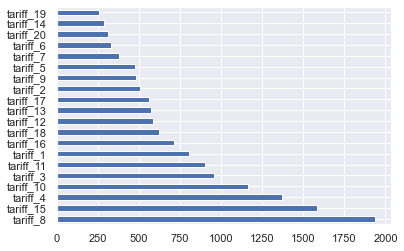

In [136]:
change_tariff['tariff_plan_code_from'].value_counts().plot(kind='barh')

In [138]:
change_tariff['tariff_plan_code_from'].value_counts()

tariff_8     1939
tariff_15    1582
tariff_4     1369
tariff_10    1166
tariff_3      958
tariff_11     903
tariff_1      806
tariff_16     715
tariff_18     625
tariff_12     586
tariff_13     572
tariff_17     564
tariff_2      510
tariff_9      484
tariff_5      475
tariff_7      377
tariff_6      332
tariff_20     314
tariff_14     291
tariff_19     255
Name: tariff_plan_code_from, dtype: int64

# На какой тариф больше всего переходят ?

### По популярности

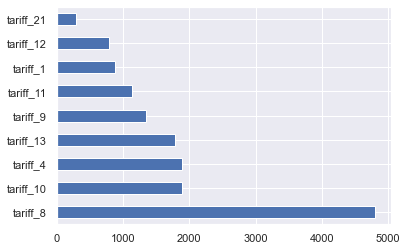

In [134]:
change_tariff['tariff_plan_code_to'].value_counts().plot(kind='barh')

In [120]:
#traffic = pd.read_csv('./data/traffic.csv')
#traffic